In [1]:
import os
import pandas as pd
import subprocess
import seaborn as sns
import bioframe as bf
import workflow.scripts.helper_func as hf

In [2]:
region_name = "oqs_0_101_10"
info = region_name.split("_")

region = hf.make_windows(f"results/g4_miner/oqs_{info[1]}.bed",
quant=False, quant_num=4,
region_size=(int(info[2])-1)*int(info[3]),
interval_length=int(info[3]))

2025-09-23 14:34:56 make_windows (results/g4_miner/oqs_0.bed) started.
2025-09-23 14:35:05 make_windows (results/g4_miner/oqs_0.bed) finished. Duration: 0:00:08.845341


In [3]:
def map_peaks(curr_file, expanded_regions, name):

        df = bf.read_table(curr_file, schema="bed")
        overlapped = bf.count_overlaps(expanded_regions, df)

        overlapped.rename(columns={"count": name}, inplace=True)

        result = subprocess.run(['wc', '-l', curr_file], capture_output=True, text=True)
        total_reads = int(result.stdout.split()[0])


        overlapped[name] = hf.calculate_rpkm(
            region_df=overlapped,
            read_counts_column=name,
            total_reads=total_reads
        )

        return overlapped

In [4]:
region = map_peaks("resources/ENCFF745RUH.bed", region, "POLR2A")
region = map_peaks("resources/ENCFF049BHH.bed", region, "DNAse-seq")
region = map_peaks("resources/HelanoUV_R1_ATAC_TAAGGCGA-TAGATCGC_S7_NFR_peaks.narrowPeak", region, "NFR no UV")
region = map_peaks("resources/Hela_1m_R3_ATAC_AGGCAGAA-CTCTCTAT_S3_NFR_peaks.narrowPeak", region, "NFR 0m")
region = map_peaks("resources/Hela_15m_R3_ATAC_AGGCAGAA-TATCCTCT_S2_NFR_peaks.narrowPeak", region, "NFR 15m")
region = map_peaks("resources/Hela_30m_R3_ATAC_NFR_peaks.narrowPeak", region, "NFR 30m")
region = map_peaks("resources/Hela_1h_R3_ATAC_NFR_peaks.narrowPeak", region, "NFR 60m")
region = map_peaks("resources/Hela_4h_R3_ATAC_TCCTGAGC-CTCTCTAT_S4_NFR_peaks.narrowPeak", region, "NFR 240m")
region = map_peaks("resources/Hela_8h_R3_ATAC_TCCTGAGC-TATCCTCT_S6_NFR_peaks.narrowPeak", region, "NFR 480m")


/cta/users/cazgari/miniconda3/envs/g4/lib/python3.12/site-packages/bioframe/io/fileops.py:75: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)
/cta/users/cazgari/miniconda3/envs/g4/lib/python3.12/site-packages/bioframe/io/fileops.py:75: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)
/cta/users/cazgari/miniconda3/envs/g4/lib/python3.12/site-packages/bioframe/io/fileops.py:75: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filepath_or, **kwargs)
/cta/users/cazgari/miniconda3/envs/g4/lib/python3.12/site-packages/bioframe/io/fileops.py:75: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df =

In [5]:
region

,chrom,start,end,name,score,strand,window,POLR2A,DNAse-seq,NFR no UV,NFR 0m,NFR 15m,NFR 30m,NFR 60m,NFR 240m,NFR 480m
0,chr10,134575,134585,region_0,3,+,-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10,134585,134595,region_0,3,+,-49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr10,134595,134605,region_0,3,+,-48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr10,134605,134615,region_0,3,+,-47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10,134615,134625,region_0,3,+,-46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261121,chrX,155686000,155686010,region_408525,2,-,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261122,chrX,155686010,155686020,region_408525,2,-,47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261123,chrX,155686020,155686030,region_408525,2,-,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41261124,chrX,155686030,155686040,region_408525,2,-,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='window', ylabel='NFR 0m'>

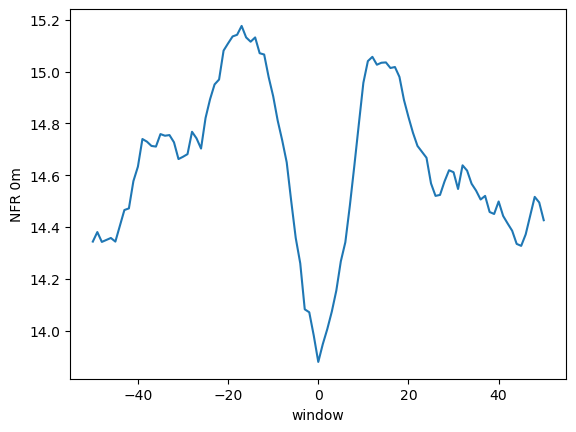

In [6]:
region_group = region[["window", "NFR 0m"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="NFR 0m", x="window")

<Axes: xlabel='window', ylabel='NFR 0m'>

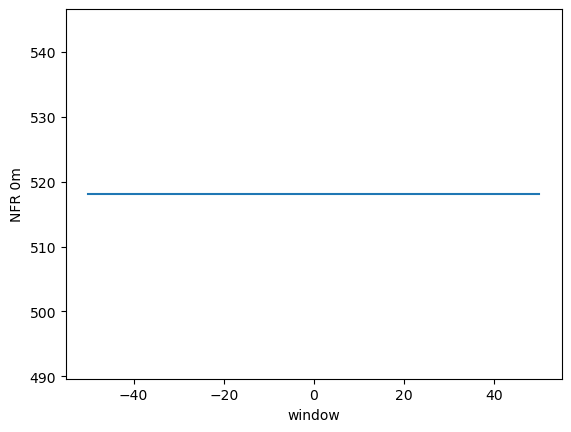

In [7]:
region_group = region[region["NFR 0m"] > 0][["window", "NFR 0m"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="NFR 0m", x="window")

In [8]:
region.head()

,chrom,start,end,name,score,strand,window,POLR2A,DNAse-seq,NFR no UV,NFR 0m,NFR 15m,NFR 30m,NFR 60m,NFR 240m,NFR 480m
0,chr10,134575,134585,region_0,3,+,-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr10,134585,134595,region_0,3,+,-49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr10,134595,134605,region_0,3,+,-48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr10,134605,134615,region_0,3,+,-47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr10,134615,134625,region_0,3,+,-46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
import numpy as np

# True for rows whose region (name) has all-zero POLR2A
mask = region.groupby('name')['POLR2A'].transform(lambda s: (s == 0).all())

# Option A: new status column
region['signal_status'] = np.where(mask, 'no_signal', 'signal')


In [15]:
mask.value_counts()

POLR2A
True     39790768
False     1470358
Name: count, dtype: int64

<Axes: xlabel='window', ylabel='POLR2A'>

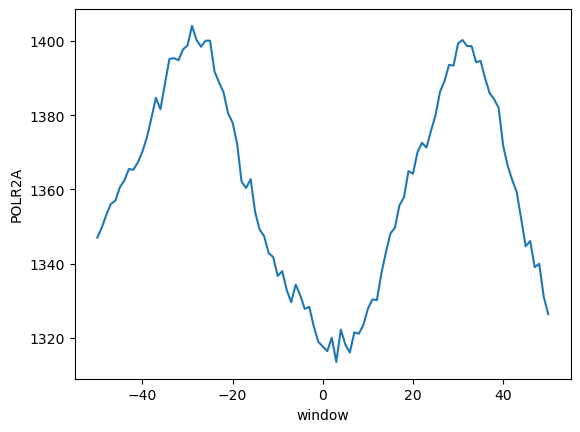

In [16]:
region_group = region[region["signal_status"] == "signal"][["window", "POLR2A"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="POLR2A", x="window")

<Axes: xlabel='window', ylabel='DNAse-seq'>

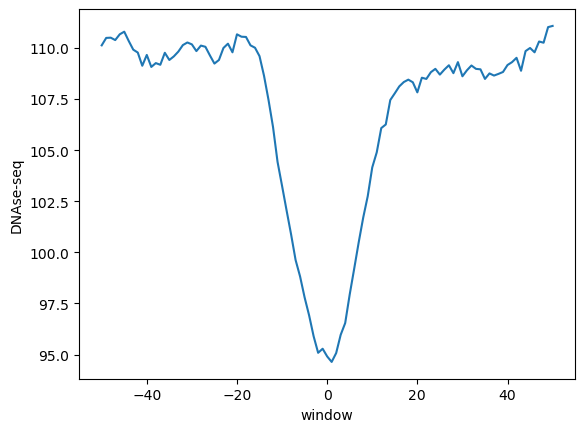

In [11]:
import numpy as np

# True for rows whose region (name) has all-zero DNAse-seq
mask = region.groupby('name')['DNAse-seq'].transform(lambda s: (s == 0).all())

# Option A: new status column
region['signal_status'] = np.where(mask, 'no_signal', 'signal')

region_group = region[region["signal_status"] == "signal"][["window", "DNAse-seq"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="DNAse-seq", x="window")


<Axes: xlabel='window', ylabel='DNAse-seq'>

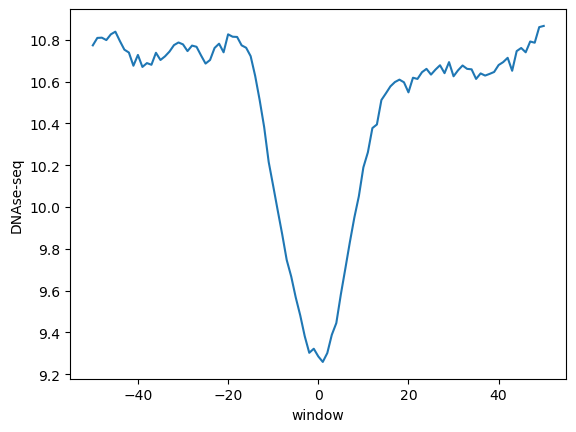

In [24]:
region_group = region[["window", "DNAse-seq"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="DNAse-seq", x="window")

<Axes: xlabel='window', ylabel='POLR2A'>

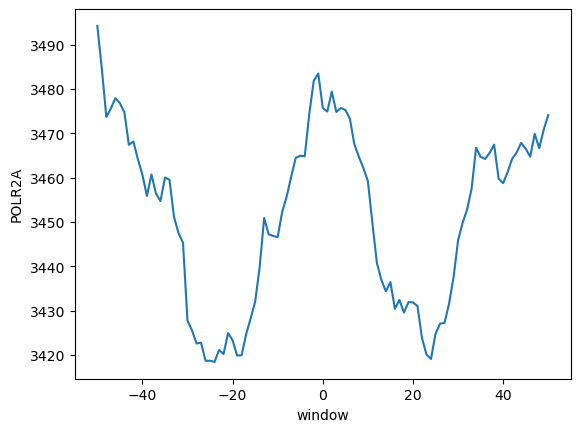

In [18]:
region_group = region[region["POLR2A"] > 0][["window", "POLR2A"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="POLR2A", x="window")

<Axes: xlabel='window', ylabel='POLR2A'>

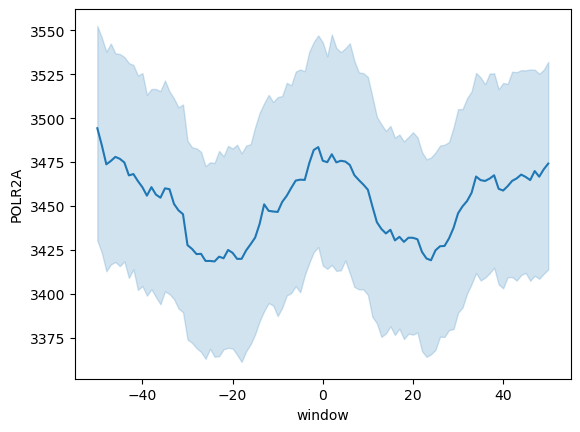

In [20]:
sns.lineplot( data=region[region["POLR2A"] > 0], y="POLR2A", x="window")

<Axes: xlabel='window', ylabel='POLR2A'>

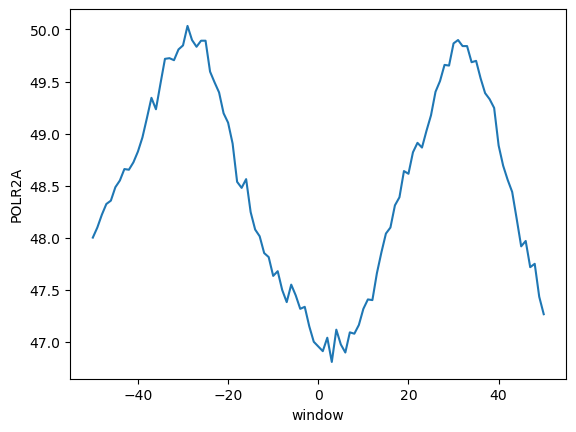

In [19]:
region_group = region[["window", "POLR2A"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="POLR2A", x="window")

In [ ]:
region_group = region[region["signal_status"] == "signal"][["window", "DNAse-seq"]].groupby("window").mean().reset_index()
sns.lineplot( data=region_group, y="DNAse-seq", x="window")